In [2]:
import numpy as np
import copy as cp 
from tqdm import tqdm_notebook as tqdm

### Define the Environment

A server requires information from a sensor. The server would like the information to be fresh. However, there is a cost to querying information from the sensor. 
<ol>
    <li>The state at the server canbe either fresh or stale. The former indicates that the information at the server about the sensor is fresh and the latter indicates that it is stale.</li> 
    <li>At any time, the server may choose to query or remain silent. </li>
   </ol>
MDP given in the diagrma

In [3]:
class ServerProb():
    def __init__(self):
        '''
        Initialize the Gridword
        self.state (list) : How many non-termimal state does this GridWordHave
        self.statePlus : Non terminal + terminal state
        self.posibleStateAction : Possible action for each state
        self.dynamic : Dynamics of this GridWorld
        '''
        self.state = np.arange(1,3)
        self.statePlus = np.arange(1,3)
        self.posibleStateAction = self.defPossibleStateAction()
        self.dynamic = self.defineDynamic() 
        
    def defPossibleStateAction(self):
        #defining Possible action for this ServerProb
        posibleStateAction = dict()
        for s in self.state:
            posibleStateAction[s] = [1,2]  #query,silent
        return posibleStateAction
    
    def defineDynamic(self):
        #defining the dynamics of the Environmvent
        dynamic = dict()
        dynamic[(1,1)] = [(1,-4,0.9),(2,-4,.1)]
        dynamic[(1,2)] = [(1,4,.5),(2,4,.5)]
        dynamic[(2,1)] = [(1,-8,0.8),(2,-8,.2)]
        dynamic[(2,2)] = [(2,4,1)]
        return dynamic

### Value Iteration

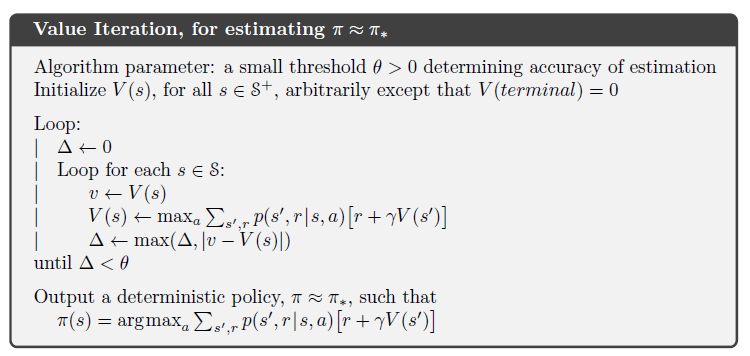

In [4]:
def valuesIteration(env,v,gamma = 0.5,threshold=0.01):
    '''
    This is the implementation of Policy Iteration
    '''
    hist = []
    while True:
        delta = 0
        for s in env.state:
            vtemp = 0
            actionReward = []
            for action in env.posibleStateAction[s]:
                actTemp = 0
                for sDash,reward,prob in env.dynamic[(s,action)]:
                    #print(prob,reward, v[sDash-1] )
                    actTemp += prob * (reward + gamma * v[sDash-1])
                actionReward.append(actTemp)
            vtemp = max(actionReward)
            delta = max(delta,abs(vtemp-v[s-1]))
            v[s-1] = vtemp
        #print(v,delta)
        hist.append(cp.deepcopy(v))
        if (delta < threshold):
            break;
    return hist

In [5]:
def oneStepLookAhead(s,env,v,gamma = 1):
    '''
    This method is use to do a one step lookahead.
    It is used when when we when we were imporivng the policy Step 3
    '''
    actionReward = []
    for action in env.posibleStateAction[s]:
        act = 0
        for sDash,reward,prob in env.dynamic[(s,action)]:
            act += prob * (reward + gamma * v[sDash-1])
        actionReward.append(act)
    return actionReward

In [6]:
def findPolicy(env,v):
    newPolicy = dict()
    for s in env.state:
        #get the values from each of values function
        actionRewards = oneStepLookAhead(s,env,v)
        #placing 1 which has the hightest values
        maxReward = [1 if i == max(actionRewards) else 0 for i in actionRewards ]
        #finding the probability
        maxReward = maxReward/np.sum(maxReward)
        #making the new Policy
        newPolicy[s] = [(i+1,j) for i,j in enumerate(maxReward) ]
    return newPolicy

In [7]:
def printPolicy(policy):
    print("state \t [query,\t       silent]")
    for key in policy:
        print(key ,"\t", policy[key])

In [8]:
env = ServerProb() 
v = np.zeros(len(env.statePlus))
hist = valuesIteration(env,v)
policy = findPolicy(env,hist[-1])
print("Final Policy")
printPolicy(policy)

Final Policy
state 	 [query,	       silent]
1 	 [(1, 0.0), (2, 1.0)]
2 	 [(1, 0.0), (2, 1.0)]


In [9]:
hist

[array([4., 4.]),
 array([6., 6.]),
 array([7., 7.]),
 array([7.5, 7.5]),
 array([7.75, 7.75]),
 array([7.875, 7.875]),
 array([7.9375, 7.9375]),
 array([7.96875, 7.96875]),
 array([7.984375, 7.984375]),
 array([7.9921875, 7.9921875])]